In [291]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [223]:
dst = pd.read_csv('defense_stats_and_projections.csv')
qbs = pd.read_csv('qb_stats_and_projections.csv')
wrs = pd.read_csv('wr_stats_and_projections.csv')
rbs = pd.read_csv('rb_stats_and_projections.csv')
te = pd.read_csv('te_stats_and_projections.csv')
ks = pd.read_csv('kicker_stats_and_projections.csv')


In [272]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
wrs = wrs.rename(columns={"POSITION": "PLAYER POSITION"})

# print(NFL_df.columns)
# print(qbs.columns)
# print(temp_dst.columns)
# print(wrs.columns)
# print(rbs.columns)

In [225]:
def clean_dataset(df):
    return df.replace(np.nan, 0.0, inplace=True) # Turns all nan values to 0.0

In [271]:
clean_dataset(wrs)
clean_dataset(qbs)
clean_dataset(NFL_df) # clean the dataset replacce nan with 0.0 

In [275]:
NFL_df = pd.concat([qbs, wrs, rbs, te], sort = True) #For this example we just going to be using WR's and QB's and total

In [276]:
NFL_df = NFL_df.drop(['2019 ATTEMPTED PASS', '2019 AVG REC YARDS', '2019 AVG REC YDS',
       '2019 CAR', '2019 COMPLETED PASS', '2019 FPTS', '2019 INT',
       '2019 PASSING TD', '2019 PASSING YDS', '2019 REC', '2019 REC TD',
       '2019 REC TDS', '2019 REC YARDS', '2019 REC YDS', '2019 RUSH AVG',
       '2019 RUSH CAR', '2019 RUSH TD', '2019 RUSH TDS', '2019 RUSH YARDS',
       '2019 RUSH YDS', '2019 TAR'], axis=1)
NFL_df.columns  #Only want the 2020 stats for now to predict for next year football is always changing so unreasonable to keep multi-year data

Index(['2020 ATTEMPTED PASS', '2020 AVG REC YARDS', '2020 AVG REC YDS',
       '2020 CAR', '2020 COMPLETED PASS', '2020 FPTS', '2020 INT',
       '2020 OUTLOOK', '2020 PASSING TD', '2020 PASSING YDS',
       '2020 PLAYER OUTLOOK', '2020 REC', '2020 REC TD', '2020 REC TDS',
       '2020 REC YARDS', '2020 REC YDS', '2020 RUSH AVG', '2020 RUSH CAR',
       '2020 RUSH TD', '2020 RUSH TDS', '2020 RUSH YARDS', '2020 RUSH YDS',
       '2020 TAR', 'PLAYER NAME', 'PLAYER POSITION', 'POINTS',
       'Player OUTLOOK', 'TEAM', 'TEAM NAME', 'USAGE', 'Unnamed: 0'],
      dtype='object')

In [283]:
#Testing the hypothesis that the best way to rank the league is best on usage by position and not by the whole league in general. Helping me do better in my own league draft next year.
# 

#Standard Scoring for WR's based on performance
wrs['POINTS'] = (wrs['2020 REC YARDS']*0.1 + wrs['2020 REC TDS']*6+ wrs['2020 RUSH YARDS']*0.1 + wrs['2020 RUSH TDS']*6) #- rb_df['FL']*2)
#Standard Usage for WR's targets/carries
wrs['USAGE'] = (wrs['2020 TAR'] + wrs['2020 RUSH CAR'])

#Standard Scoring for QB's based on performance
qbs['POINTS'] = (qbs['2020 PASSING YDS']*0.04 + qbs['2020 PASSING TD']*6 + qbs['2020 RUSH TD']*6+ qbs['2020 RUSH YDS']*0.1 - qbs['2020 INT']*2)
#Standard Usage for QB's attempted passes/carries
qbs['USAGE'] = (qbs['2020 ATTEMPTED PASS'] + qbs['2020 CAR'])

# Standard Scoring for the entire league
NFL_df['POINTS'] = (NFL_df['2020 REC YARDS']*0.1 + NFL_df['2020 REC TDS']*6 + NFL_df['2020 RUSH YDS']*0.1 + NFL_df['2020 REC TDS']*6 + NFL_df['2020 RUSH TD']*6 + NFL_df['2020 PASSING YDS']*0.04 + NFL_df['2020 PASSING TD']*6- NFL_df['2020 INT']*2)
# Standard Usage amount of targets/carries/attempted passes
NFL_df['USAGE'] = (NFL_df['2020 TAR'] + NFL_df['2020 RUSH CAR'] + NFL_df['2020 ATTEMPTED PASS'] + NFL_df['2020 CAR'])


294.64


In [233]:
def rmse(actual, predicted):
    """Calculates RMSE from actual and predicted values"""
    return np.sqrt(np.mean((actual-predicted)**2))

In [234]:
x1 = qbs['USAGE'].values.reshape(-1,1)
y1 = qbs['POINTS'].values.reshape(-1,1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x1_train, y1_train)
y1_pred = regressor.predict(x1_test)

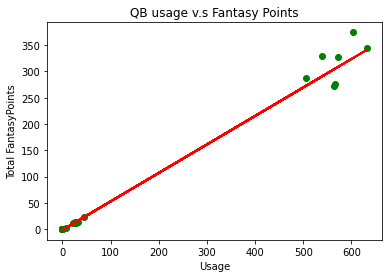

In [311]:
plt.scatter(x1_test, y1_test,  color='green')
plt.plot(x1_test, y1_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.title('QB usage v.s Fantasy Points')
plt.show()

In [317]:
print("Standard error of points per QB and usage", rmse(y1_test, y1_pred))
r2_qb = r2_score(y1_test, y1_pred)
print("coeffecient of determination (r^2):" , r2_qb)

Standard error of points per QB and usage 16.07464543035994
coeffecient of determination (r^2): 0.986955247513537


In [237]:
x = wrs['USAGE'].values.reshape(-1, 1)
y = wrs['POINTS'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

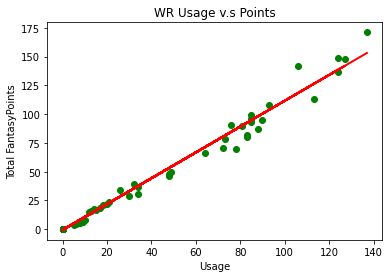

In [330]:
plt.scatter(x_test, y_test,  color='green')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.title('WR Usage v.s Points')
plt.show()

In [329]:
print("Error in points:",rmse(y_test,y_pred)) #Error of our Prediction most WR perform regularly under usage
r2_wr = r2_score(y_test, y_pred)
print("coeffecient of determination:" , r2_wr) # Strong correlation between WR usage and WR fantasy points
# accuracy = accuracy_score(y, y_pred)
# print(accuracy)

Error in points: 5.7732321650908025
coeffecient of determination: 0.9847091096554346


In [327]:
rank_wr = wrs.sort_values(['USAGE'], ascending=[False]) #Since there is a strong correlation between 
# rank_wr.head(10)
# rank_qb = qbs.sort_values(['USAGE'], ascending= [False]) 
# rank_qb.head(10)

In [306]:
clean_dataset(NFL_df)
x2 = NFL_df['USAGE'].values.reshape(-1,1)
y2 = NFL_df['POINTS'].values.reshape(-1,1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x2_train, y2_train)
y2_pred = regressor.predict(x2_test)

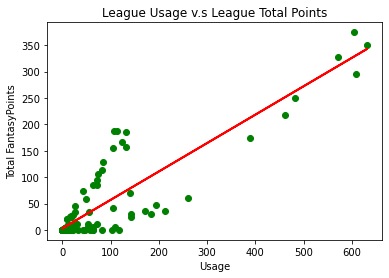

In [319]:
plt.scatter(x2_test, y2_test,  color='green')
plt.plot(x2_test, y2_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.title('League Usage v.s League Total Points')
plt.show()

In [309]:
LEAGUE = r2_score(y2_test, y2_pred)
print("coeffecient of determination:" , LEAGUE) # Correlation is not that strong so its unwise to use this but instead use separate rankings
print("Error in points:", rmse(y2_test, y2_pred))

coeffecient of determination: 0.7906181930234907
Error in points: 29.486804515059248


In [ ]:
rank_LEAGUE = NFL_df.sort_values(['USAGE'], ascending= [False])
# rank_LEAGUE.head(100)